## __Preliminary Analysis__ 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.ticker as ticker

In [45]:
corruption_df=pd.read_stata("corruptiondata.dta")
print(corruption_df.info())
print(corruption_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 116 entries, uf to esample2
dtypes: float32(48), float64(7), int16(1), int32(1), int8(58), object(1)
memory usage: 148.9+ KB
None
         nsorteio   totrecursos      tot_os            pop        purb  \
count  476.000000  4.760000e+02  451.000000     476.000000  476.000000   
mean     6.897059  5.566446e+06   42.031042   25417.367647    0.601536   
std      2.799983  8.532342e+06   19.611650   40595.987128    0.230635   
min      2.000000  8.296480e+04   14.000000    1270.000000    0.118746   
25%      4.000000  1.432963e+06   29.000000    7824.000000    0.419877   
50%      7.000000  2.852640e+06   36.000000   14049.000000    0.609153   
75%      9.000000  5.738083e+06   50.000000   26214.250000    0.810575   
max     11.000000  9.582892e+07  140.000000  449476.000000    1.000000   

       p_secundario      cod_ibge6  pib_capita_02    op_01_04    reeleito  \
count    476.000000     476.000000     476.00

In [46]:
key_vars = ['pcorrupt', 'ncorrupt_os', 'valor_corrupt']
print(corruption_df[key_vars].describe())

         pcorrupt  ncorrupt_os  valor_corrupt
count  476.000000   476.000000   4.760000e+02
mean     0.063007     0.052944   2.573789e+05
std      0.101719     0.052353   5.721196e+05
min      0.000000     0.000000   0.000000e+00
25%      0.000000     0.013795   0.000000e+00
50%      0.020127     0.040000   6.628117e+04
75%      0.076568     0.074074   2.677460e+05
max      0.793582     0.322581   6.113400e+06


In [47]:
grouped_stats = corruption_df.groupby('first').agg({
    'pcorrupt': ['mean', 'std'],
    'ncorrupt_os': ['mean', 'std'],
    'valor_corrupt': ['mean', 'std'],
    'first': ['count']  
}).reset_index()

grouped_stats.columns = ['first', 'pcorrupt_mean', 'pcorrupt_std', 
                         'ncorrupt_os_mean', 'ncorrupt_os_std', 
                         'valor_corrupt_mean', 'valor_corrupt_std', 
                         'count']

print(grouped_stats)

   first  pcorrupt_mean  pcorrupt_std  ncorrupt_os_mean  ncorrupt_os_std  \
0    0.0       0.073672      0.105368          0.057275         0.051828   
1    1.0       0.054871      0.098264          0.049640         0.052605   

   valor_corrupt_mean  valor_corrupt_std  count  
0       307730.906250      677101.531192    206  
1       218962.140625      474521.825969    270  


/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_66179/1468385054.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first', y='pcorrupt', data=corruption_df, palette='Set2', ax=axes[1])


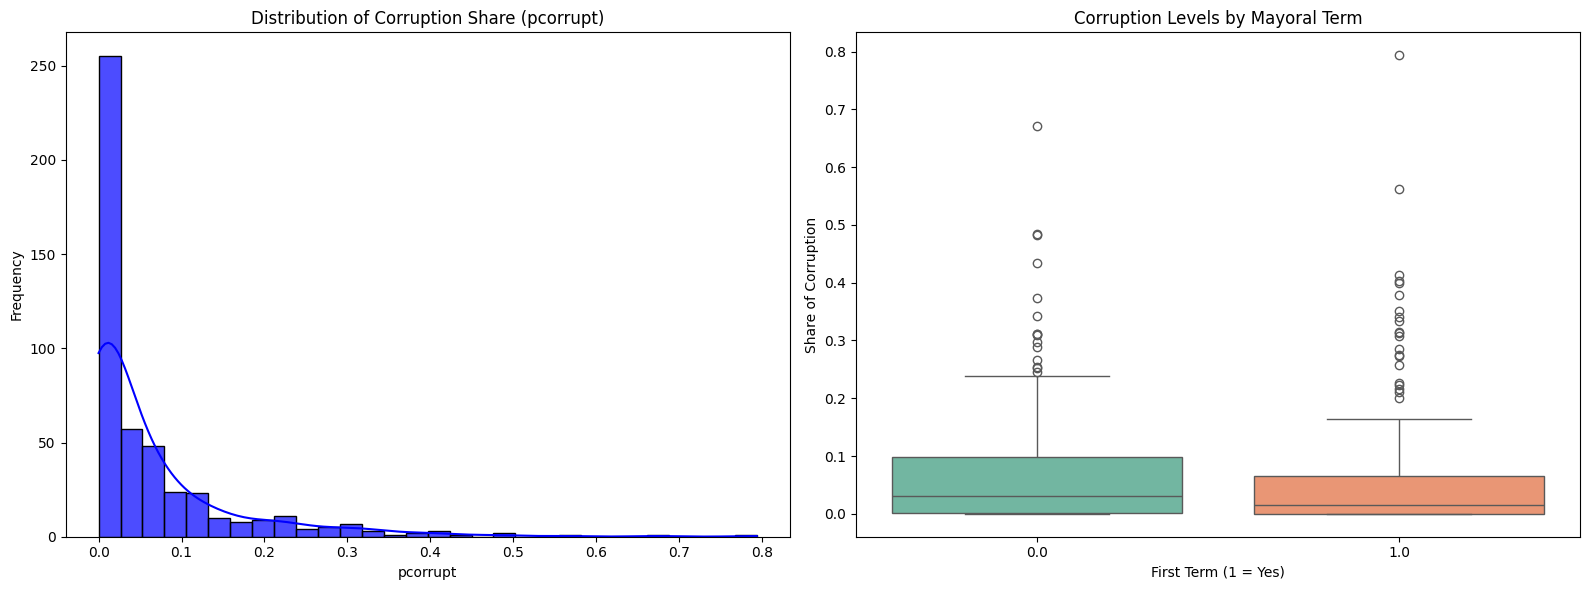

In [48]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Histogram of corruption measures
sns.histplot(corruption_df['pcorrupt'], bins=30, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Corruption Share (pcorrupt)')
axes[0].set_xlabel('pcorrupt')
axes[0].set_ylabel('Frequency')

# Boxplot of corruption measures by treatment
sns.boxplot(x='first', y='pcorrupt', data=corruption_df, palette='Set2', ax=axes[1])
axes[1].set_title('Corruption Levels by Mayoral Term')
axes[1].set_xlabel('First Term (1 = Yes)')
axes[1].set_ylabel('Share of Corruption')

# Adjust layout and display
plt.tight_layout()
plt.show()




/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_66179/4238575490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first', y='ncorrupt_os', data=corruption_df, palette='Set2', ax=axes[1])


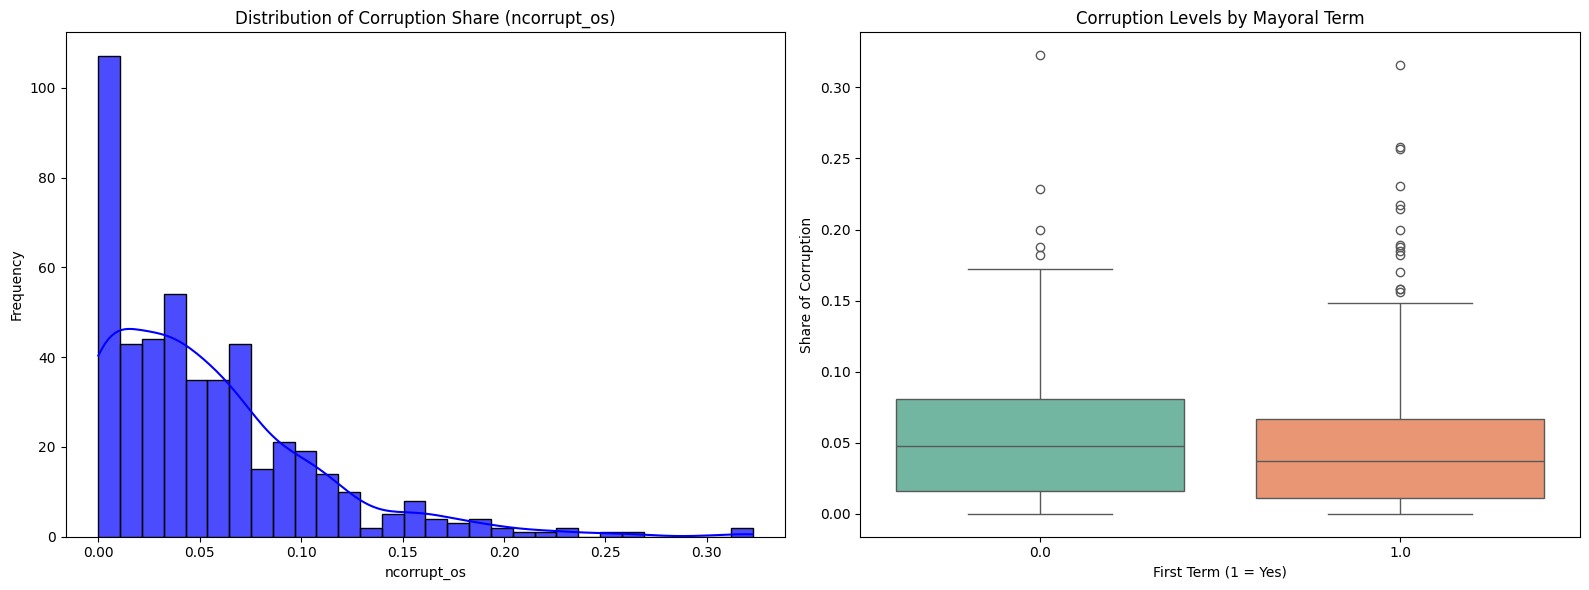

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Histogram of corruption measures
sns.histplot(corruption_df['ncorrupt_os'], bins=30, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Corruption Share (ncorrupt_os)')
axes[0].set_xlabel('ncorrupt_os')
axes[0].set_ylabel('Frequency')

# Boxplot of corruption measures by treatment
sns.boxplot(x='first', y='ncorrupt_os', data=corruption_df, palette='Set2', ax=axes[1])
axes[1].set_title('Corruption Levels by Mayoral Term')
axes[1].set_xlabel('First Term (1 = Yes)')
axes[1].set_ylabel('Share of Corruption')

# Adjust layout and display
plt.tight_layout()
plt.show()


/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_66179/2595224010.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first', y='valor_corrupt', data=corruption_df, palette='Set2', ax=axes[1])


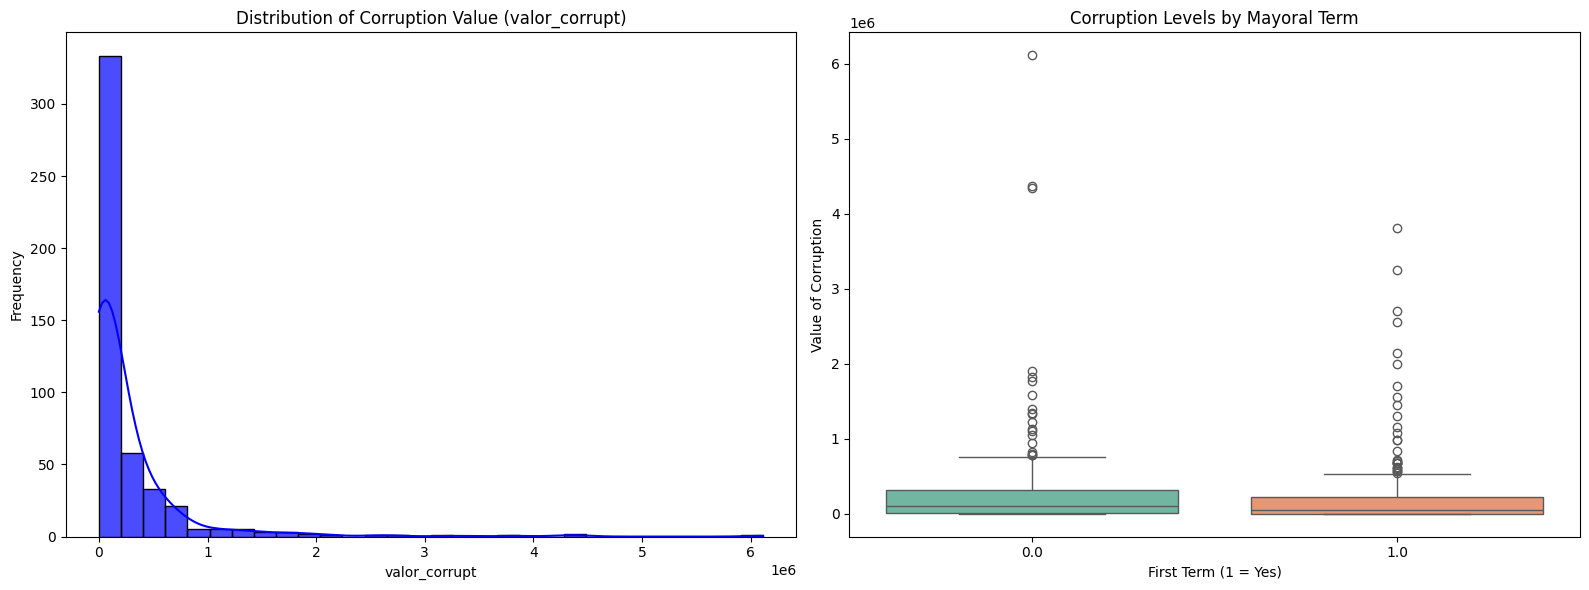

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Histogram of corruption measures
sns.histplot(corruption_df['valor_corrupt'], bins=30, kde=True, color='blue', alpha=0.7, ax=axes[0])
axes[0].set_title('Distribution of Corruption Value (valor_corrupt)')
axes[0].set_xlabel('valor_corrupt')
axes[0].set_ylabel('Frequency')

# Boxplot of corruption measures by treatment
sns.boxplot(x='first', y='valor_corrupt', data=corruption_df, palette='Set2', ax=axes[1])
axes[1].set_title('Corruption Levels by Mayoral Term')
axes[1].set_xlabel('First Term (1 = Yes)')
axes[1].set_ylabel('Value of Corruption')

# Adjust layout and display
plt.tight_layout()
plt.show()